# Amazon Sales Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_excel(r'D:\Github\Amazon Sales Data Analysis\Raw Data\SALESDATA.xls', parse_dates=['DateKey','Invoice Date', 'Promised Delivery Date'])

In [3]:
sales.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.0,237.91,237.910000,1,184,EA
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.0,456.17,456.170000,1,127,EA
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.0,438.93,438.930000,1,127,EA
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.0,211.75,211.750000,1,160,EA
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE


In [4]:
sales.shape

(65282, 20)

## Data Cleaning

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [6]:
sales.isnull().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8289
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

In [7]:
sales.drop(['Item Class'], axis = 1, inplace = True)

In [8]:
sales.dropna(subset = ['Discount Amount', 'Item Number', 'Sales Price'], inplace = True)

## Descriptive Statistics

In [9]:
sales.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,6.524100e+04,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000
mean,1.001770e+07,1857.310923,216292.785242,23725.043178,515.016834,180567.610122,2853.121051,4710.431974,1662.023052,1191.097999,283.250283,45.106712,137.421422
std,7.175846e+03,9039.535784,94982.018695,32669.565014,449.144896,67612.238675,15169.020896,20702.609533,9559.396917,5862.566647,250.448615,429.793733,26.644271
min,1.000045e+07,-255820.800000,100034.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,0.337341,1.000000,103.000000
25%,1.001272e+07,246.280000,117969.000000,3000.000000,181.560000,115281.000000,308.310000,561.040000,167.810000,129.890000,100.030000,2.000000,113.000000
50%,1.001966e+07,442.200000,222904.000000,12000.000000,325.190000,203695.000000,553.940000,999.750000,304.580000,246.480000,183.282857,3.000000,134.000000
75%,1.002351e+07,1001.500000,314325.000000,32000.000000,803.860000,218576.000000,1279.750000,2321.400000,688.550000,578.220000,448.220000,8.000000,160.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000


In [10]:
# Creating Year, Month, Quarter and Day Columns 

sales['Invoice_Year'] = sales['Invoice Date'].dt.year
sales['Invoice_Month'] = sales['Invoice Date'].dt.month
sales['Invoice_Quarter'] = sales['Invoice Date'].dt.quarter
sales['Invoice_Day'] = sales['Invoice Date'].dt.day

<AxesSubplot:>

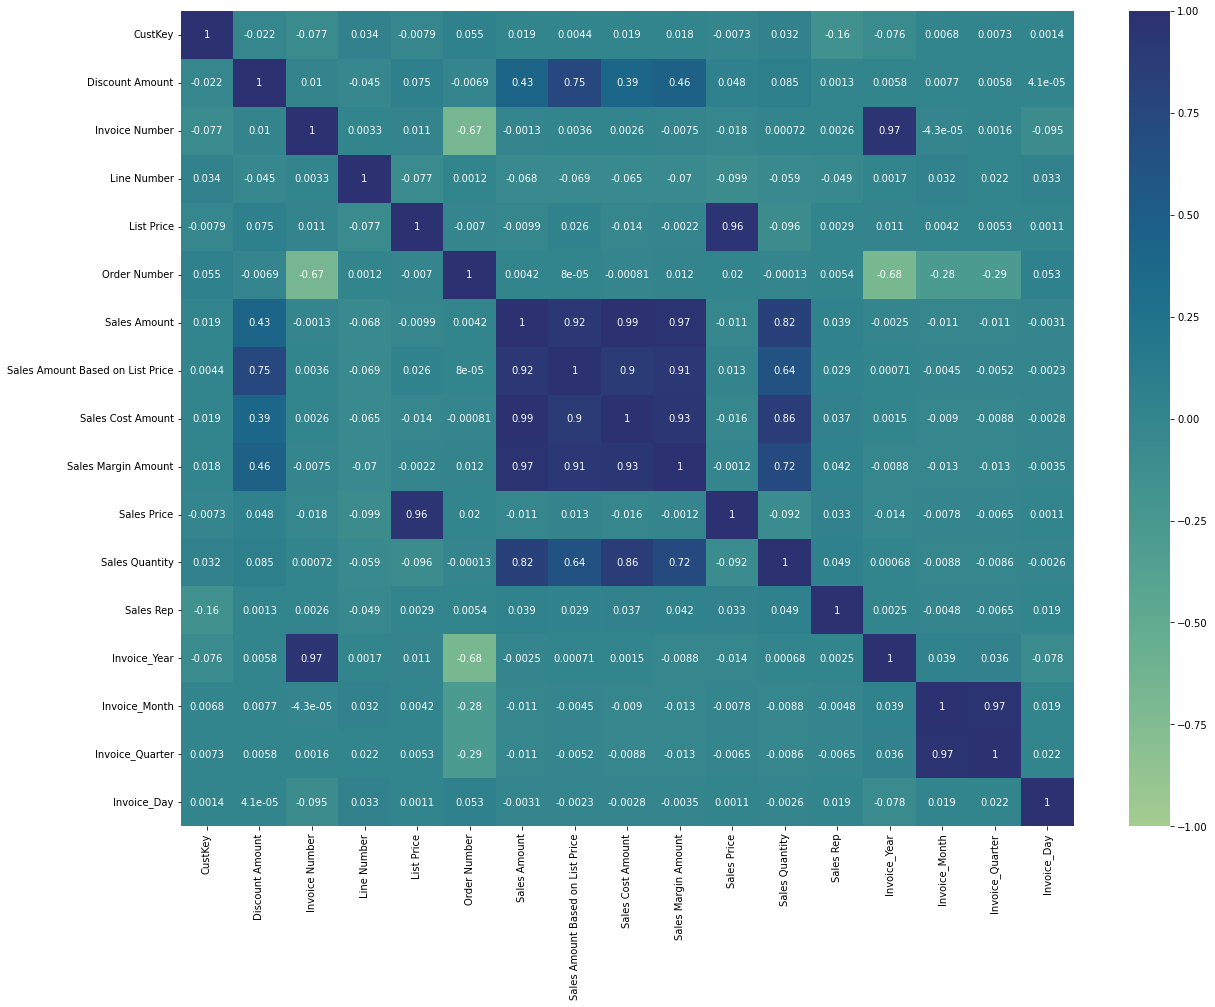

In [11]:
# Finding correlation

plt.figure(figsize=(20,15))
sns.heatmap(sales.corr(method = 'pearson'), vmin = -1, vmax = 1, annot = True, cmap = 'crest')

### Observations:

- Discount Amount is highly related to Sales Amount, Sales Cost Amount, Sales Amount Based on List Price and Sales Margin Amount.
- List Price highly related to sales price and has no relations with Sales amount, Sales cost amount, Sales amount based on list price & sales margin amount.
- Sales quantity is highly related to Sales Amount, Sales Cost Amount, Sales Amount Based on List Price and Sales Margin Amount.

In [12]:
# Top 10 days when sales were highest

sales.groupby('Invoice Date', as_index = False)['Sales Amount'].sum().sort_values(by = 'Sales Amount', ascending = False)[0:10]

,Invoice Date,Sales Amount
250,2017-12-24,1379283.19
188,2017-09-29,1076202.88
118,2017-06-18,1075725.71
124,2017-06-26,1058162.59
233,2017-12-01,1023459.66
428,2019-06-30,1011561.10
434,2019-07-08,1010930.03
543,2019-12-13,981740.87
498,2019-10-11,981740.87
310,2018-03-19,895210.58


In [13]:
# Sales by Year

sales.groupby('Invoice_Year', as_index = False)['Sales Amount'].sum()

,Invoice_Year,Sales Amount
0,2017,87416407.83
1,2018,20817471.00
2,2019,77906591.65


In [14]:
# Top 10 customers by sales margin amount

sales.groupby('CustKey', as_index = False)['Sales Margin Amount'].sum().sort_values(by = 'Sales Margin Amount', ascending = False)[0:10]

,CustKey,Sales Margin Amount
406,10021485,5215559.07
138,10009676,4716492.43
504,10025024,3316495.86
394,10021300,2878721.22
516,10025052,1766515.25
512,10025039,1579871.07
566,10025737,1544679.20
573,10025919,1429428.34
309,10019194,1296375.47
525,10025241,1275027.40
